### Connect ao Banco

In [43]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# URL de conexão ao banco
db_url = 'postgresql://admin:uber.10@db:5432/uberdb'

try:
    # Cria o engine
    engine = create_engine(db_url)

    # Faz a consulta
    df = pd.read_sql_query('SELECT * FROM uber', con=engine)

    print("Conexão OK!")
    display(df.head())  # mostra as primeiras linhas, se estiver num notebook

except Exception as e:
    print(f"Erro ao conectar com o banco de dados: {e}")

Conexão OK!


,Date,Time,Booking_ID,Booking_Status,Customer_ID,Vehicle_Type,Pickup_Location,Drop_Location,Avg_VTAT,Avg_CTAT,Reason_for_cancelling_by_Customer,Driver_Cancellation_Reason,Incomplete_Rides_Reason,Booking_Value,Ride_Distance,Driver_Ratings,Customer_Rating,Payment_Method
0,2024-03-23,12:29:38,CNR5884300,No Driver Found,CID1982111,eBike,Palam Vihar,Jhilmil,8.454819,29.150249,Reason Unknown,Reason Unknown,Reason Unknown,508.29023,24.640956,4.230756,4.404301,UPI
1,2024-11-29,18:01:39,CNR1326809,Incomplete,CID4604802,Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.900000,14.000000,Reason Unknown,Reason Unknown,Vehicle Breakdown,237.00000,5.730000,4.230756,4.404301,UPI
2,2024-08-23,08:56:10,CNR8494506,Completed,CID9202816,Auto,Khandsa,Malviya Nagar,13.400000,25.800000,Reason Unknown,Reason Unknown,Reason Unknown,627.00000,13.580000,4.900000,4.900000,Debit Card
3,2024-10-21,17:17:25,CNR8906825,Completed,CID2610914,Premier Sedan,Central Secretariat,Inderlok,13.100000,28.500000,Reason Unknown,Reason Unknown,Reason Unknown,416.00000,34.020000,4.600000,5.000000,UPI
4,2024-09-16,22:08:00,CNR1950162,Completed,CID9933542,Bike,Ghitorni Village,Khan Market,5.300000,19.600000,Reason Unknown,Reason Unknown,Reason Unknown,737.00000,48.210000,4.100000,4.300000,UPI


## EDA

### Análise do tipos de veículos

In [44]:
df['Vehicle_Type'].unique()

array(['eBike', 'Go Sedan', 'Auto', 'Premier Sedan', 'Bike', 'Go Mini',
       'Uber XL'], dtype=object)

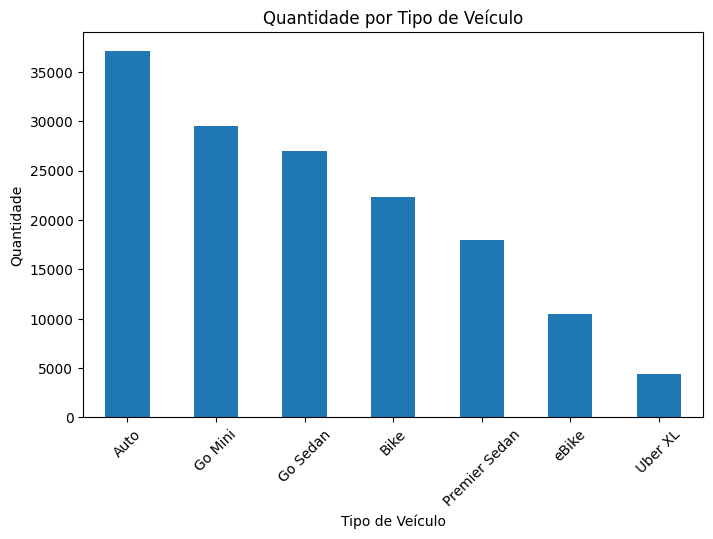

In [ ]:
# Contagem por categoria
counts = df['Vehicle_Type'].value_counts()

# Gráfico de barras
plt.figure(figsize=(8,5))
counts.plot(kind='bar')

plt.title("Quantidade por Tipo de Veículo")
plt.xlabel("Tipo de Veículo")
plt.ylabel("Quantidade")
plt.xticks(rotation=45)
plt.show()



### Motivos para as corridas não terem sido completadas

In [46]:
df['Incomplete_Rides_Reason'].unique()

array(['Reason Unknown', 'Vehicle Breakdown', 'Other Issue',
       'Customer Demand'], dtype=object)

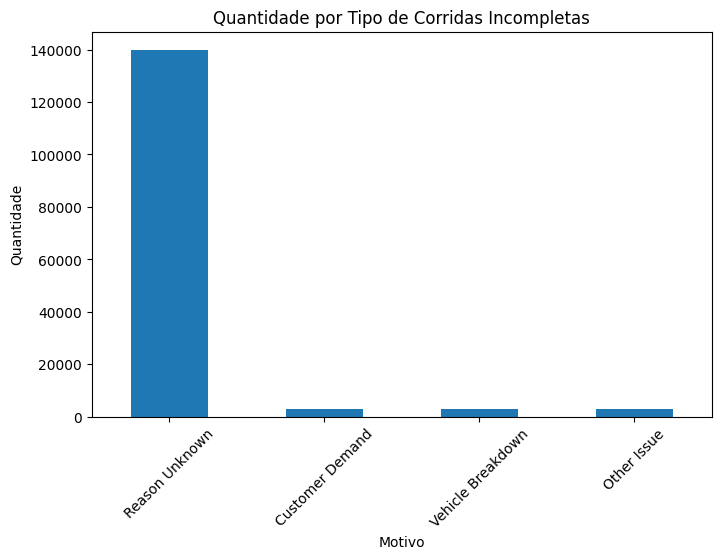

In [47]:
# Contagem por categoria
counts = df['Incomplete_Rides_Reason'].value_counts()

# Gráfico de barras
plt.figure(figsize=(8,5))
counts.plot(kind='bar')

plt.title("Quantidade por Tipo de Corridas Incompletas")
plt.xlabel("Motivo")
plt.ylabel("Quantidade")
plt.xticks(rotation=45)
plt.show()

### Análise para o motorista ter cancelado a corrida

In [48]:
df['Driver_Cancellation_Reason'].unique()

array(['Reason Unknown', 'Personal & Car related issues',
       'Customer related issue', 'More than permitted people in there',
       'The customer was coughing/sick'], dtype=object)

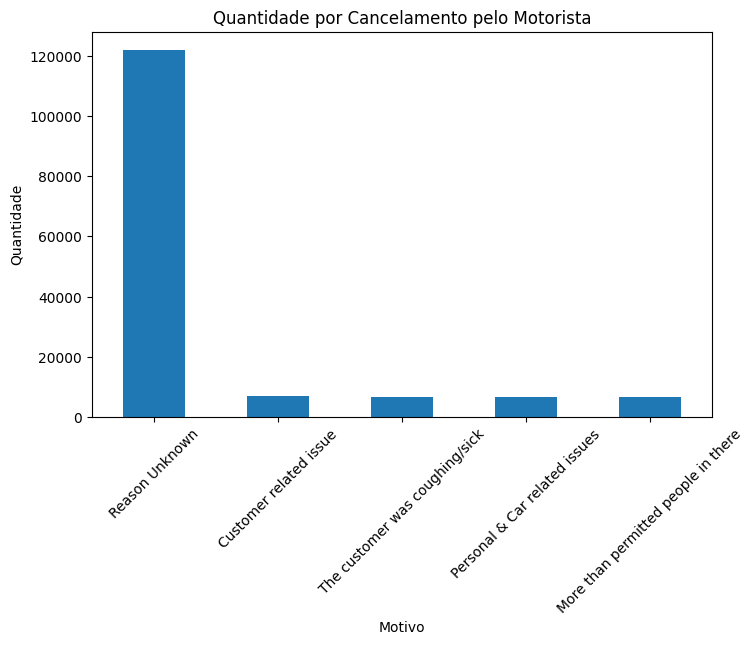

In [49]:
# Contagem por categoria
counts = df['Driver_Cancellation_Reason'].value_counts()

# Gráfico de barras
plt.figure(figsize=(8,5))
counts.plot(kind='bar')

plt.title("Quantidade por Cancelamento pelo Motorista")
plt.xlabel("Motivo")
plt.ylabel("Quantidade")
plt.xticks(rotation=45)
plt.show()

### Boxplot - Valores das corridas

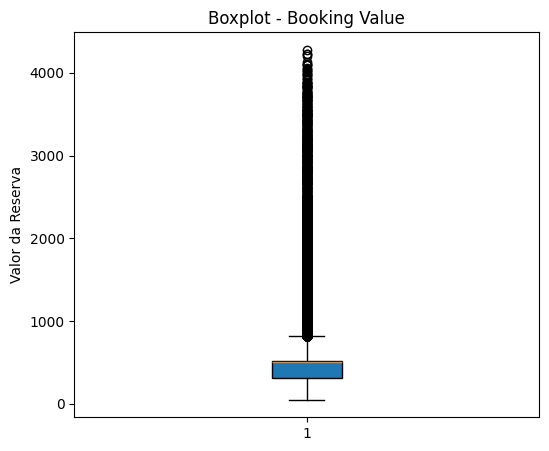

In [52]:
data = df['Booking_Value'].dropna()

plt.figure(figsize=(6,5))
plt.boxplot(data, vert=True, patch_artist=True)

plt.title("Boxplot - Booking Value")
plt.ylabel("Valor da Reserva")
plt.show()

### Quantidade de Corridas por Horário

In [53]:
df['Time']

0         12:29:38
1         18:01:39
2         08:56:10
3         17:17:25
4         22:08:00
            ...   
148762    19:34:01
148763    15:55:09
148764    10:55:15
148765    07:53:34
148766    15:38:03
Name: Time, Length: 148767, dtype: object

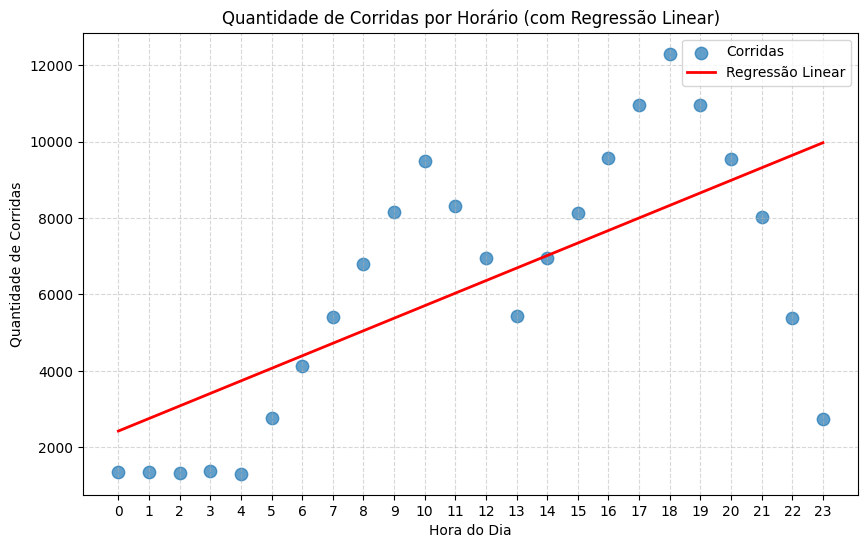

In [54]:
df['Time_str'] = df['Time'].apply(lambda t: t.strftime('%H:%M:%S') if pd.notnull(t) else np.nan)


df['Time_td'] = pd.to_timedelta(df['Time_str'], errors='coerce')
df = df.dropna(subset=['Time_td'])
df['Hour'] = df['Time_td'].dt.components.hours

rides_per_hour = df['Hour'].value_counts().sort_index()

X = rides_per_hour.index.to_numpy().astype(float)  # horas como float
y = rides_per_hour.values.astype(float)            # quantidade de corridas

coef = np.polyfit(X, y, 1)
poly1d_fn = np.poly1d(coef)

plt.figure(figsize=(10,6))
plt.scatter(X, y, s=80, alpha=0.7, label="Corridas")
plt.plot(X, poly1d_fn(X), color="red", linewidth=2, label="Regressão Linear")

plt.title("Quantidade de Corridas por Horário (com Regressão Linear)")
plt.xlabel("Hora do Dia")
plt.ylabel("Quantidade de Corridas")
plt.xticks(range(0,24))
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()

### Valor das Corridas por Hora do Dia

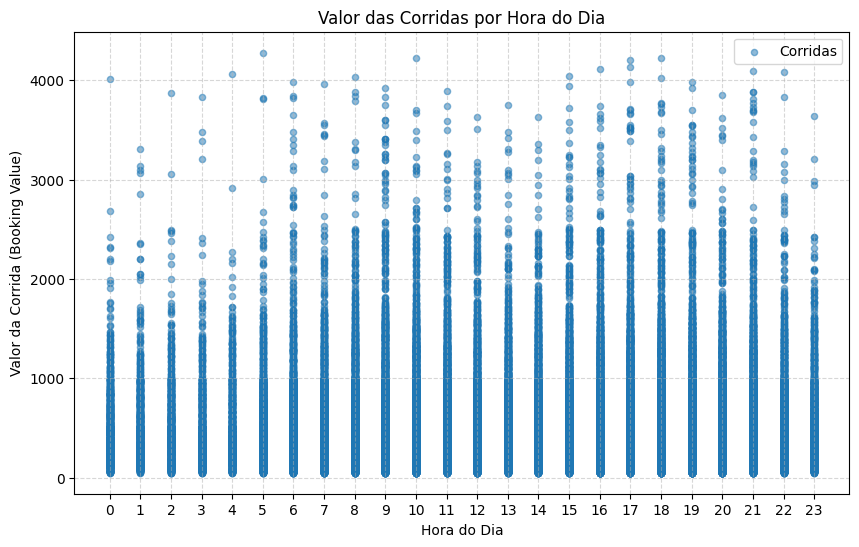

In [55]:
df['Time_str'] = df['Time'].apply(lambda t: t.strftime('%H:%M:%S') if pd.notnull(t) else np.nan)

df['Time_td'] = pd.to_timedelta(df['Time_str'], errors='coerce')

df['Hour'] = df['Time_td'].dt.components.hours

data = df[['Hour', 'Booking_Value']].dropna()

X = data['Hour'].to_numpy()
y = data['Booking_Value'].to_numpy()

plt.figure(figsize=(10,6))
plt.scatter(X, y, alpha=0.5, s=20, label="Corridas")

plt.title("Valor das Corridas por Hora do Dia")
plt.xlabel("Hora do Dia")
plt.ylabel("Valor da Corrida (Booking Value)")
plt.xticks(range(0,24))
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()

### Média do Valor das Corridas por Hora do Dia

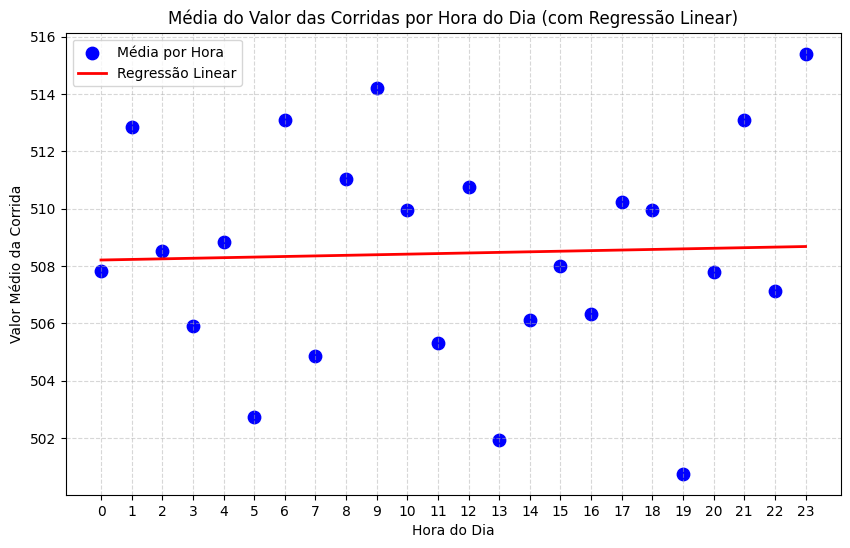

In [56]:
# --- Passo 1: Converter Time para string HH:MM:SS caso seja datetime.time ---
df['Time_str'] = df['Time'].apply(lambda t: t.strftime('%H:%M:%S') if pd.notnull(t) else np.nan)

# --- Passo 2: Converter para timedelta para extrair hora ---
df['Time_td'] = pd.to_timedelta(df['Time_str'], errors='coerce')

# --- Passo 3: Extrair hora ---
df['Hour'] = df['Time_td'].dt.components.hours

# --- Passo 4: Calcular média do Booking Value por hora ---
mean_values = df.groupby('Hour')['Booking_Value'].mean()

# --- Passo 5: Preparar arrays para regressão ---
X = mean_values.index.to_numpy().astype(float)
y = mean_values.values.astype(float)

# --- Passo 6: Ajustar regressão linear ---
coef = np.polyfit(X, y, 1)   # grau 1 -> linha
poly1d_fn = np.poly1d(coef)

# --- Passo 7: Gráfico ---
plt.figure(figsize=(10,6))
plt.scatter(X, y, s=80, color="blue", label="Média por Hora")
plt.plot(X, poly1d_fn(X), color="red", linewidth=2, label="Regressão Linear")

plt.title("Média do Valor das Corridas por Hora do Dia (com Regressão Linear)")
plt.xlabel("Hora do Dia")
plt.ylabel("Valor Médio da Corrida")
plt.xticks(range(0,24))
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()